# Memory Based Collaborative Filtering Recommender

The goal of the **recommender system** is to predict user preference for a set of items based on past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.

**Collaborative filtering** is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.

**Memory based algorithms** apply statistical techniques to the entire dataset to calculate the predictions. They can be divided into two main sections: user-item filtering and item-item filtering. The closest user or items are calculated only by using Cosine similarity or Pearson correlation coefficients, which are only based on arithmetic operations.

The goal of this exercise is to compare user-item and item-item approach, try different configurations of parameters, optimize model performance and explore obtained results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

import functions as f

This analysis will focus on book recommendations based on [Book-Crossing dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). To reduce the dimensionality of the data set and avoid running into memory error it will focus on users with at least 3 ratings and top 10% most frequently rated books. It consists of 176,594 records.

The recommender systems will be built using [surprise package](https://surprise.readthedocs.io/en/stable/getting_started.html#getting-started) (KNN-based models).

In [2]:
df = pd.read_csv('data/ratings_top.csv')

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [3]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(df), len(df['isbn'].unique()), len(df['user_id'].unique())))

Number of ratings: 138181
Number of books: 8383
Number of users: 18767


## KNN Model Selection

K-Nearest Neighbours algorithm calculates the distances between users or items and finds the closest ones = the most similar ones. Surprise package offers several variations of the model. The comparison of those models shows that KNNBaseline model gives the best performance in terms of RMSE error but it is the most time-consuming when it comes to training (and testing).

In [5]:
models1 = f.generate_models_dict([KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline], ['msd'], True)
results1 = f.cv_multiple_models(data, models1)
display(results1)


---> CV for KNNBasic msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithZScore msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity

,fit_time,model,test_mae,test_rmse,test_time
0,11.945322,KNNBasic msd,1.485301,1.939152,1.599797
1,12.236100,KNNWithMeans msd,1.352903,1.807844,1.588807
2,10.513621,KNNWithZScore msd,1.336548,1.803514,1.700801
3,12.615087,KNNBaseline msd,1.349201,1.775448,1.894335


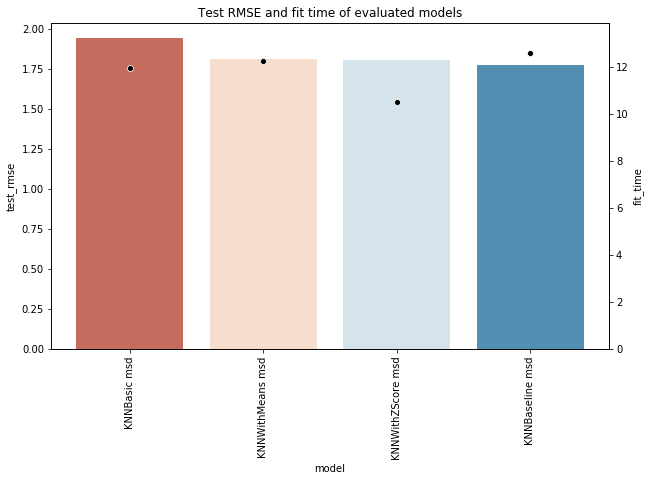

In [6]:
f.draw_model_results(results1)

Which KNN model to choose?

**The best MAE score** KNN with Z score - slightly better than KNN with Means but it takes more time to fit & test this model. It's calculation formula is more complicated thus it's better to choose KNN with Means.

**The best RMSE score** KNN Baseline - the longest fit and test time.

It seems reasonable to choose KNN with Means for further analysis.

## User-Item Model Selection

User-Item approach is to determine a set of the most similar users to the user U (based on their past ratings) and to calculate the rating for the item I based on the ratings assigned by those users.

In [4]:
models2 = f.generate_models_dict([KNNWithMeans], ['cosine', 'msd', 'pearson'], True)
results2 = f.cv_multiple_models(data, models2)
display(results2)


---> CV for KNNWithMeans cosine...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans pearson...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

,fit_time,model,test_mae,test_rmse,test_time
0,13.746709,KNNWithMeans cosine,1.339286,1.791965,1.476531
1,21.700971,KNNWithMeans msd,1.347580,1.807540,2.962351
2,40.621773,KNNWithMeans pearson,1.338314,1.796613,2.831364


## Item-Item Model Selection

Item-Item approach is to determine a set of the most similar items to the item I (based on the past ratings of other users) and to calculate the rating for the item I based on the ratings of similar items rated by the user U.

In [5]:
models3 = f.generate_models_dict([KNNWithMeans], ['cosine', 'msd', 'pearson'], False)
results3 = f.cv_multiple_models(data, models3)
display(results3)


---> CV for KNNWithMeans cosine...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans pearson...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity mat

,fit_time,model,test_mae,test_rmse,test_time
0,13.246844,KNNWithMeans cosine,1.298585,1.724191,4.058651
1,4.885317,KNNWithMeans msd,1.310884,1.745059,4.313284
2,18.700936,KNNWithMeans pearson,1.330420,1.750024,3.654195


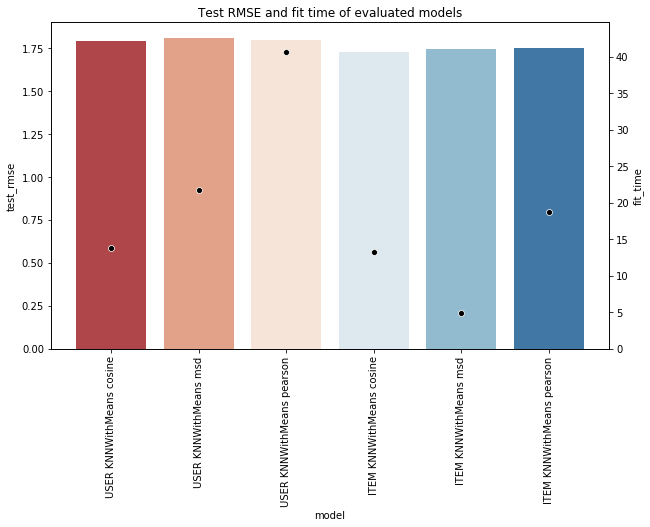

In [6]:
results2['model'] = 'USER ' + results2['model']
results3['model'] = 'ITEM ' + results3['model']

f.draw_model_results(pd.concat([results2, results3]))

## Memory Based Model Optimisation

In [84]:
param_grid = {'k': [20,40],
              'min_k': [1,3]
              'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }
gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

#1.7144841610870258
#{'k': 60, 'min_k': 3, 'sim_options': {'name': 'cosine', 'min_support': 1, 'user_based': False}}

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix.

Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matr

## Analysis of results

In [7]:
trainset, testset = train_test_split(data, test_size=0.2)

sim_options = {
    'name': 'cosine',
    'user_based': False
}

model = KNNWithMeans(sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [8]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])

df_pred['k'] = df_pred['details'].apply(f.k_from_details)
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)

df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
15792,261829,0671038443,8.0,7.592099,25,False,8.0,0.407901
4561,33822,0553277472,6.0,7.638298,0,False,8.0,1.638298
17282,168816,0385296495,9.0,6.319878,3,False,6.0,2.680122
7003,102647,0061000043,7.0,7.079520,31,False,7.0,0.079520
3974,56554,0373250312,9.0,7.717730,17,False,8.0,1.282270


### Distribution of actual and predicted ratings in the test set

According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable.
The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.

It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

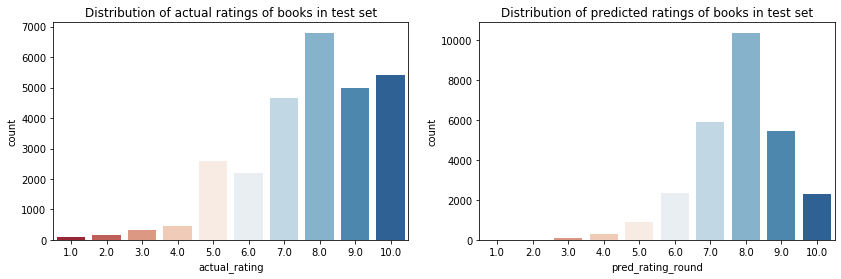

In [88]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

### Absolute error of predicted ratings

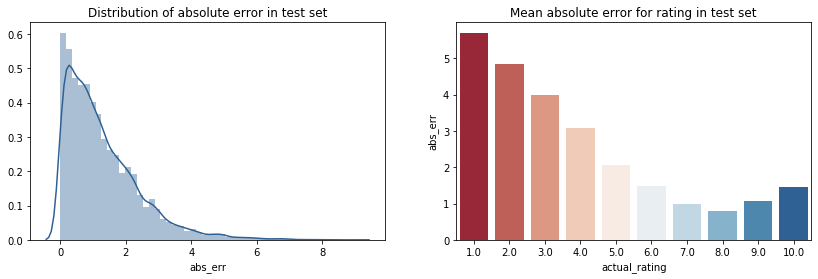

In [89]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

In [97]:
df_books = pd.read_csv('data/books.csv')

df_pred_ext = df_pred.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_pred_ext['book_title_short'] = df_pred_ext['book_title'].apply(f.short_title)
df_pred_ext.head()

,user_id,isbn,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err,book_title,book_title_short
0,249862,0671793489,10.0,8.690539,21,False,9.0,1.309461,All Around the Town,All Around the Town
1,102647,0515109509,8.0,6.693678,9,False,7.0,1.306322,The Cat Who Moved a Mountain,The Cat Who Moved a Mountain
2,191795,0765340747,9.0,7.764836,1000,True,8.0,1.235164,"The Pillars of Creation (Sword of Truth, Book 7)","The Pillars of Creation (Sword of Truth,"
3,47465,0446611867,10.0,7.116393,2,False,7.0,2.883607,A Bend in the Road,A Bend in the Road
4,97493,0316602051,10.0,6.848680,2,False,7.0,3.151320,The Jester,The Jester


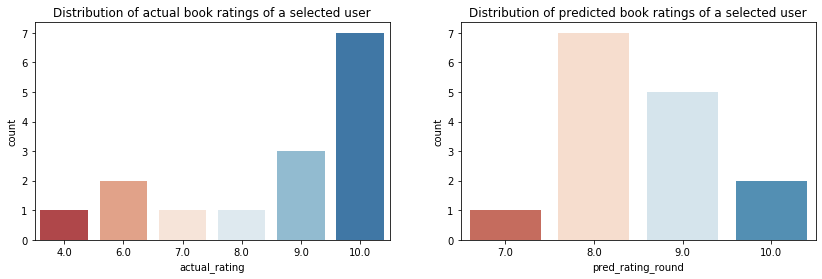

In [101]:
# Selected user: 246311
selected_user_id = 246311

df_pred_user = df_pred_ext[df_pred_ext['user_id']==selected_user_id]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred_user, palette=sns.color_palette("RdBu", len(df_pred_user['actual_rating'].unique())), ax=ax1)
ax1.set_title('Distribution of actual book ratings of a selected user')

sns.countplot(x='pred_rating_round', data=df_pred_user, palette=sns.color_palette("RdBu", len(df_pred_user['pred_rating_round'].unique())), ax=ax2)
ax2.set_title('Distribution of predicted book ratings of a selected user')

plt.show()

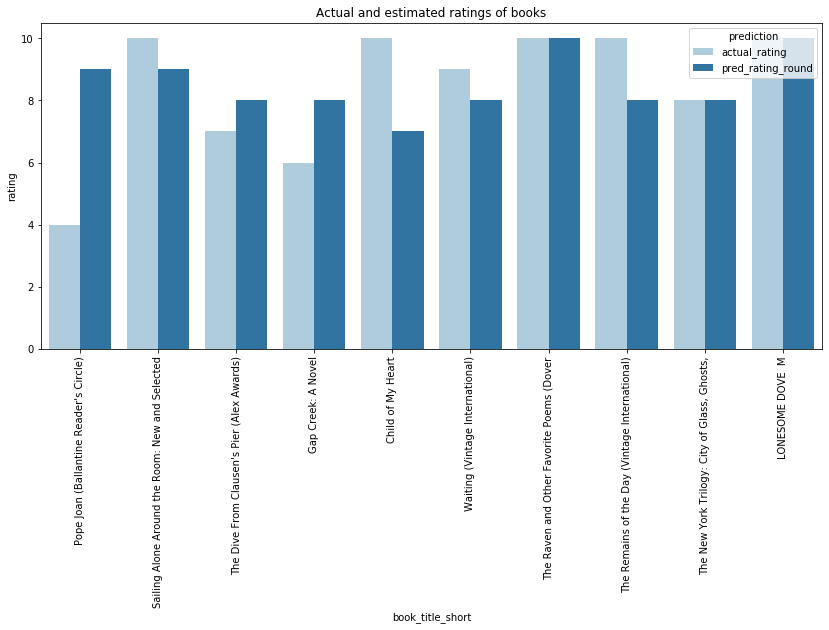

In [112]:
df_pred_sample = df_pred_user[df_pred_user['pred_rating_round'].notna()].sample(10)
df_pred_sample = pd.melt(df_pred_sample[['book_title_short', 'actual_rating', 'pred_rating_round']], id_vars='book_title_short', var_name='prediction', value_name='rating')

fig, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x='book_title_short', y='rating', hue='prediction', data=df_pred_sample, palette=sns.color_palette("Paired"))
ax.set_title('Actual and estimated ratings of books')
plt.xticks(rotation=90)

plt.show()